<a href="https://colab.research.google.com/github/psk1994-data/fake-news-detector/blob/main/Fake_News_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn pandas

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# Load both fake and true news datasets
import pandas as pd

fake_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Fake.csv')
true_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/True.csv')

# Add labels to each
fake_df['label'] = 'FAKE'
true_df['label'] = 'REAL'

# Combine and shuffle
combined_df = pd.concat([fake_df, true_df])
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

# Preview
combined_df.head()

,title,text,subject,date,label
0,CNN ANCHOR DON LEMON: A Republican Winning in ...,CNN anchor Don Lemon got snarky during reporti...,politics,"Jun 21, 2017",FAKE
1,Turkey arrests four people over explosion at T...,ANKARA (Reuters) - Turkish authorities arreste...,worldnews,"October 14, 2017",REAL
2,Supporters to Trump: break campaign promises a...,WASHINGTON (Reuters) - Kathryn Stellmack expec...,politicsNews,"November 11, 2016",REAL
3,CIA Claims of Russian Intervention in US Elect...,21st Century Wire says How seriously can we ta...,US_News,"December 14, 2016",FAKE
4,Republican lawmaker quits conservative House g...,WASHINGTON (Reuters) - Republican U.S. Represe...,politicsNews,"March 26, 2017",REAL


In [16]:
# I'll use the 'text' column as input and 'label' as output
X = combined_df['text']
y = combined_df['label']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Convert text data into numerical vectors
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train data, only transform test data
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

In [18]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [19]:
# Make predictions
y_pred = pac.predict(tfidf_test)

# Calculate accuracy
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

# Confusion matrix
confusion = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print('Confusion Matrix:\n', confusion)

Accuracy: 99.49%
Confusion Matrix:
 [[4684   31]
 [  15 4250]]


In [21]:
# Train the Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

# Predict and evaluate
y_pred_pac = pac.predict(tfidf_test)
score_pac = accuracy_score(y_test, y_pred_pac)
print(f'PAC Accuracy: {round(score_pac * 100, 2)}%')

# Store confusion matrix
conf_matrix_pac = confusion_matrix(y_test, y_pred_pac)
print('PAC Confusion Matrix:\n', conf_matrix_pac)

PAC Accuracy: 99.49%
PAC Confusion Matrix:
 [[4683   32]
 [  14 4251]]


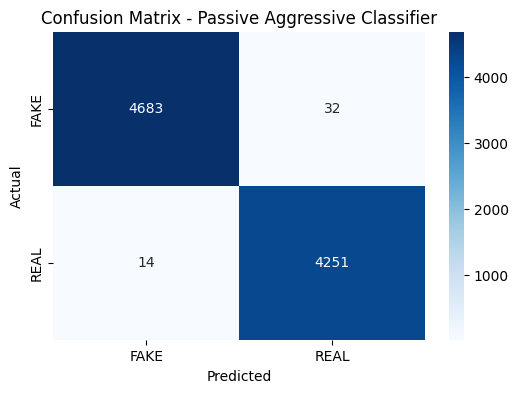

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the PAC confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_pac, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title('Confusion Matrix - Passive Aggressive Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()